# Lab 3: Data Manipulation


Partial notes refer to Brian Manzo 

# Outline

* [Homework 2](#Homework-2)
* [dplyr for data manipulation](#dplyr-functions)

In [1]:
library(tidyverse) # load tidyverse

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Homework 2

**Problem4 (d)** Write the code to generate the following piechart that summarizes the flights counts for each of the airlines for the `newflight` data. _4 points_

![title](https://github.com/keanmingtan/stats306_fall2021/blob/main/HW/HW1/piechart.png?raw=true)

In [2]:
# install.packages("gridExtra")
library(gridExtra)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [3]:
getwd()
list.files()

[1] "C:/Users/jueju/Desktop/stats 306/lab material/Lab 3"

[1] "FrenchOpen-men-2013.csv"    "newflight.RData"           
[3] "stats306_lab03.ipynb"       "stats306_lab03_draft.ipynb"

In [4]:
load(file = "newflight.RData") 

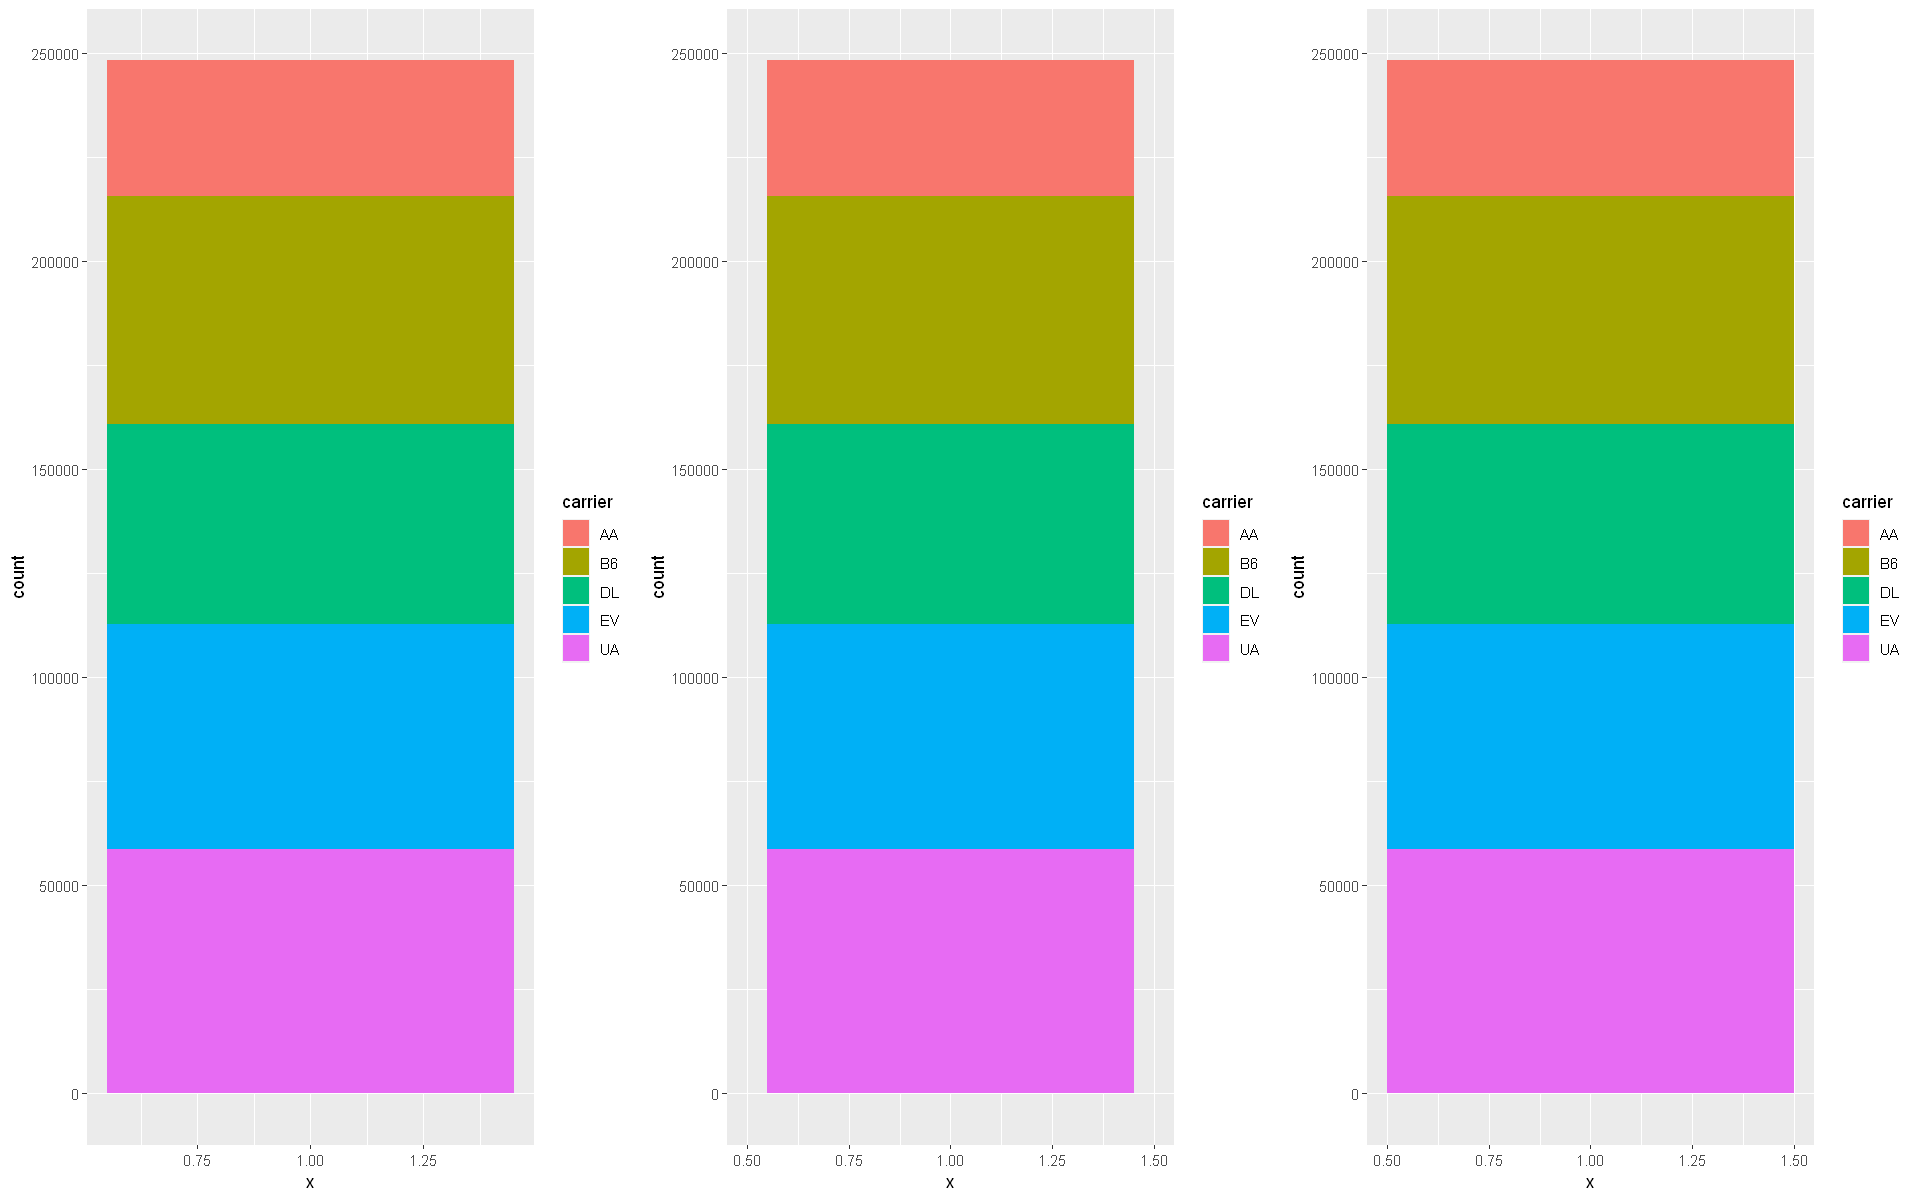

In [5]:
p1 = ggplot(data = newflight) +
    geom_bar(mapping = aes(x = 1, fill = carrier)) # default width is 0.9
p2 = ggplot(data = newflight) +
    geom_bar(mapping = aes(x = 1, fill = carrier)) + # default width is 0.9
    scale_x_continuous(breaks = c(0.5, 0.75, 1, 1.25, 1.5), limits = c(0.5, 1.5))
p3 = ggplot(data = newflight) +
    geom_bar(mapping = aes(x = 1, fill = carrier), width = 1)

options(repr.plot.width=16,repr.plot.height=10)
grid.arrange(p1, p2, p3, nrow=1, ncol=3)
options(repr.plot.width=5,repr.plot.height=5)

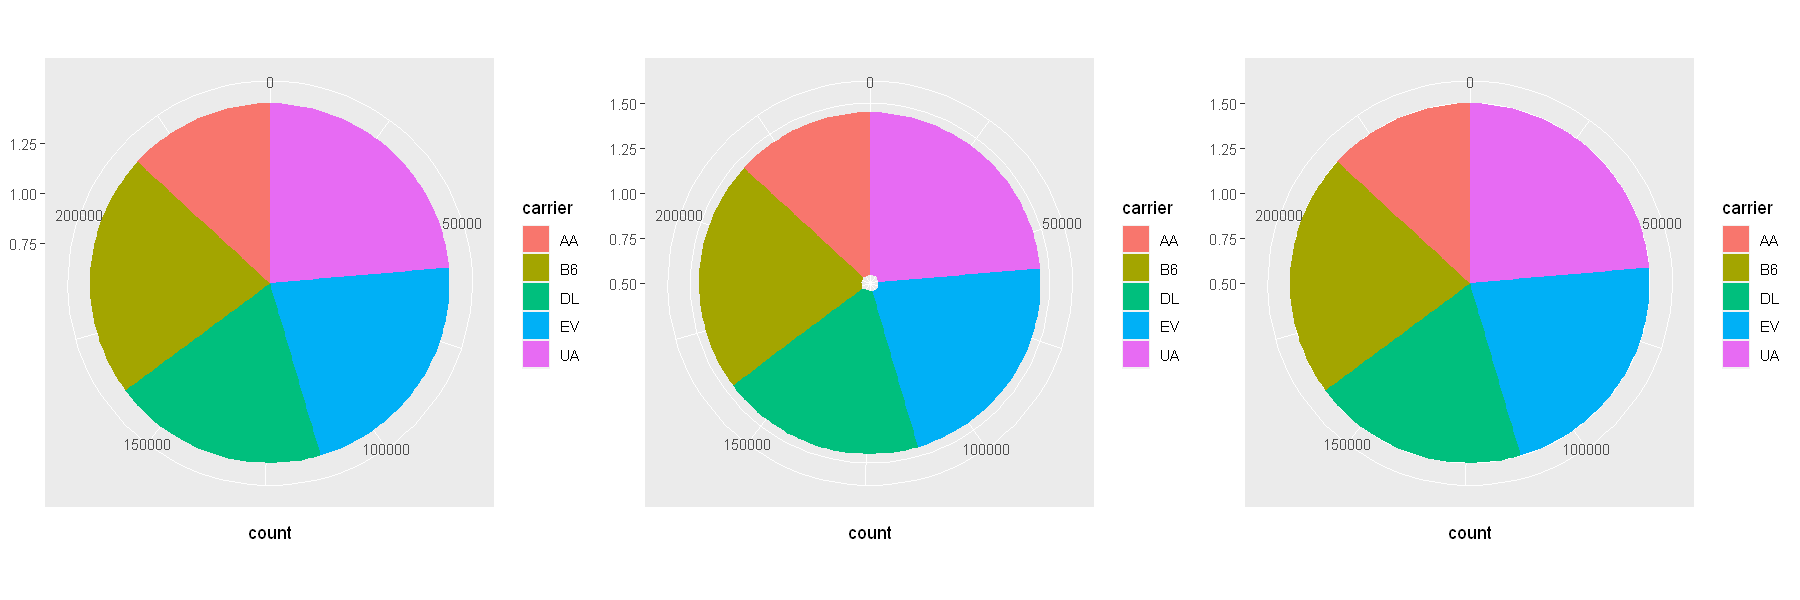

In [6]:
pp1 = ggplot(data = newflight) +
    geom_bar(mapping = aes(x = 1, fill = carrier)) +
    labs(x = NULL) + 
    coord_polar(theta ="y") 
pp2 = ggplot(data = newflight) +
    geom_bar(mapping = aes(x = 1, fill = carrier)) +
    labs(x = NULL) + 
    coord_polar(theta ="y") +
    scale_x_continuous(breaks = c(0.5, 0.75, 1, 1.25, 1.5), limits = c(0.5, 1.5))
pp3 = ggplot(data = newflight) +
    geom_bar(mapping = aes(x = 1, fill = carrier), width = 1) +
    labs(x = NULL) + 
    coord_polar(theta ="y") 

options(repr.plot.width=15,repr.plot.height=5)
grid.arrange(pp1, pp2, pp3, nrow=1, ncol=3)
options(repr.plot.width=5,repr.plot.height=5)

**Problem 5 (Challenging Problem)**
Load the `diamonds` data set.  Reproduce the following plot. 

(Hint: for this plot, you will need figure out how to manually manipulate the ticks on the $x$ and $y$ axes.)

![title](https://github.com/keanmingtan/stats306_fall2021/blob/main/HW/HW1/carat.png?raw=true)

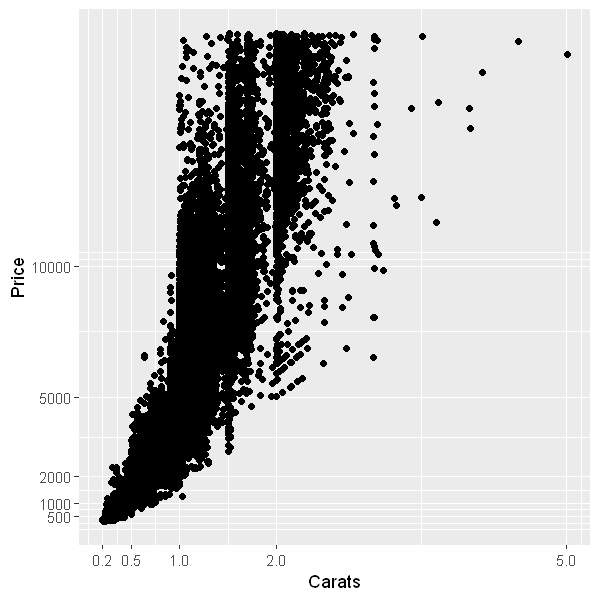

In [7]:
ggplot(data=diamonds, aes(x = carat, y = price)) + 
    geom_point( )+ 
    scale_x_continuous(name = "Carats", breaks=c(0.2,0.5, 1.0, 2.0,5.0)) +
  scale_y_continuous(name = "Price", breaks=c(500,1000, 2000, 5000,10000, 20000))

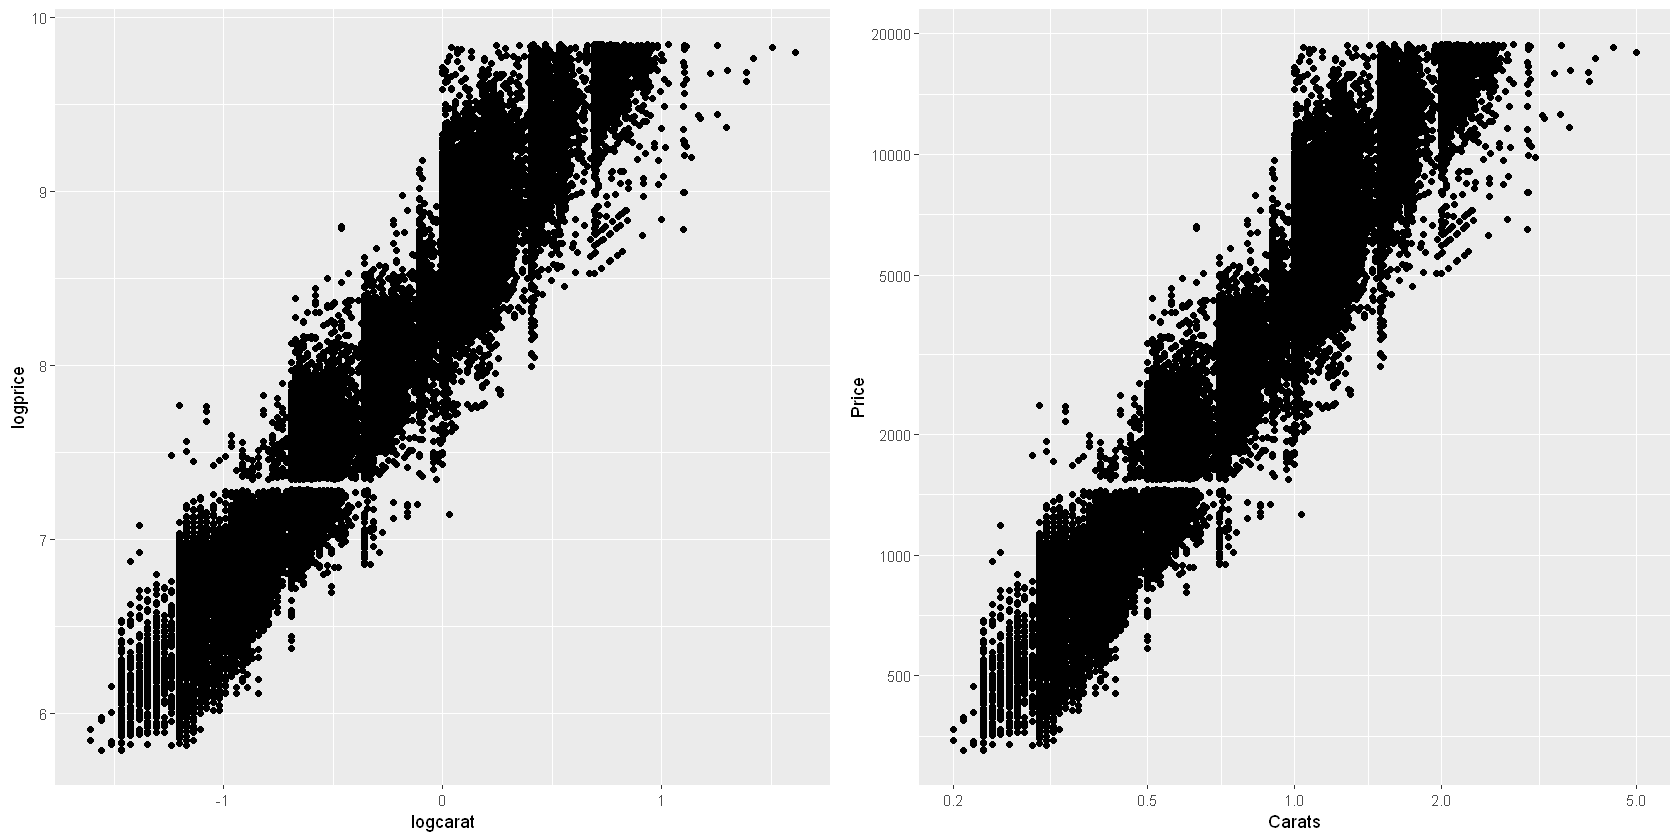

In [8]:
cp1 = diamonds %>% mutate(logcarat = log(carat), logprice = log(price)) %>% 
    ggplot(aes(x = logcarat, y = logprice)) + 
    geom_point( )

cp2 = ggplot(data=diamonds, aes(x = carat, y = price)) + 
    geom_point( )+ 
    scale_x_continuous(name = "Carats", breaks=c(0.2,0.5, 1.0, 2.0,5.0), trans = "log") +
    scale_y_continuous(name = "Price", breaks=c(500,1000, 2000, 5000,10000, 20000),trans = "log")

options(repr.plot.width=14,repr.plot.height=7)
grid.arrange(cp1, cp2, nrow=1, ncol=2)
options(repr.plot.width=7,repr.plot.height=7)

## dplyr functions

In [9]:
tennis_data = read.csv('https://raw.githubusercontent.com/bmanzo/stats306_labs/master/lab03/FrenchOpen-men-2013.csv')

In [10]:
head(tennis_data)

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Pablo Carreno-Busta,Roger Federer,1,0,0,3,62,27,38,11,...,7,7,14,18,88,6,6,6,NA,NA
2,Somdev Devvarman,Daniel Munoz-De La Nava,1,1,3,0,62,54,38,22,...,1,16,22,25,106,3,3,5,NA,NA
3,Tobias Kamke,Paolo Lorenzi,1,1,3,2,62,53,38,15,...,10,18,19,27,139,3,3,6,6,3
4,Julien Benneteau,Ricardas Berankis,1,1,3,1,72,87,28,19,...,4,13,33,43,149,6,3,7,6,NA
5,Lukas Lacko,Sam Querrey,1,0,0,3,52,31,48,22,...,4,7,12,13,93,6,6,6,NA,NA
6,Jan Hajek,Denis Kudla,1,1,3,1,70,58,30,18,...,1,7,6,9,93,2,7,0,4,NA


https://archive.ics.uci.edu/ml/datasets/Tennis+Major+Tournament+Match+Statistics#

The `filter` function is used to retrieve a subset of the full dataset

Roger Federer is a very famous tennis player. Let's use `filter` to find all the matches in which he played in the 2013 French Open.

In [15]:
(federer = tennis_data %>% 
            filter(Player1=='Roger Federer' | Player2=='Roger Federer')) 

Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Pablo Carreno-Busta,Roger Federer,1,0,0,3,62,27,38,11,...,7,7,14,18,88,6,6,6,NA,NA
Somdev Devvarman,Roger Federer,2,0,0,3,61,19,39,16,...,7,14,19,30,88,6,6,6,NA,NA
Julien Benneteau,Roger Federer,3,0,0,3,82,41,18,8,...,4,4,8,11,98,6,6,7,NA,NA
Gilles Simon,Roger Federer,4,0,2,3,61,65,39,28,...,6,14,25,35,147,6,4,2,6,6
Jo-Wilfried Tsonga,Roger Federer,5,1,3,0,75,46,25,10,...,2,3,15,30,73,5,3,3,NA,NA


 * There are also doubled versions of `&` and `|` denoted `&&` and `||`. Do not use them here. We will return to these later in the course.
 * If you want to assign as well as print the variable, enclose the command in parentheses.

The above table is useful, but we don't need all of the columns. We can use `select` to only show a subset of the columns. 

Create a new table, `fed_select`, which only shows the fields `Player1`, `Player2`, `Round`, and `Result`.

In [16]:
names(tennis_data)

[1] "Player1" "Player2" "Round"   "Result"  "FNL.1"   "FNL.2"   "FSP.1"  
 [8] "FSW.1"   "SSP.1"   "SSW.1"   "ACE.1"   "DBF.1"   "WNR.1"   "UFE.1"  
[15] "BPC.1"   "BPW.1"   "NPA.1"   "NPW.1"   "TPW.1"   "ST1.1"   "ST2.1"  
[22] "ST3.1"   "ST4.1"   "ST5.1"   "FSP.2"   "FSW.2"   "SSP.2"   "SSW.2"  
[29] "ACE.2"   "DBF.2"   "WNR.2"   "UFE.2"   "BPC.2"   "BPW.2"   "NPA.2"  
[36] "NPW.2"   "TPW.2"   "ST1.2"   "ST2.2"   "ST3.2"   "ST4.2"   "ST5.2"

In [17]:
(fed_select = tennis_data %>% 
                 filter(Player1=='Roger Federer' | Player2=='Roger Federer') %>% select(Player1:Result))

Player1,Player2,Round,Result
<chr>,<chr>,<int>,<int>
Pablo Carreno-Busta,Roger Federer,1,0
Somdev Devvarman,Roger Federer,2,0
Julien Benneteau,Roger Federer,3,0
Gilles Simon,Roger Federer,4,0
Jo-Wilfried Tsonga,Roger Federer,5,1


We can use functions such as `between` or the `%in%` operator. 

In [18]:
top_three = tennis_data %>% 
                filter(Player1 %in% c('Roger Federer', 'Novak Djokovic', 'Rafael Nadal') | 
                       Player2 %in% c('Roger Federer', 'Novak Djokovic', 'Rafael Nadal'))

In [19]:
middle_round = tennis_data %>% 
                filter(between(Round, 3, 5))

#### Common mistake when using between()
https://www.rdocumentation.org/packages/dplyr/versions/0.7.8/topics/between

In [20]:
# Correct
between(c(2020, 1998), 2000, 2021) # inclusive

[1]  TRUE FALSE

In [21]:
# Incorrect
between(2020, c(1900, 2000), c(1999, 2020)) 

ERROR: Error: `left` must be length 1


In [22]:
# Correct
between(2020, 1900, 1999)
between(2020, 2000, 2020)

[1] FALSE

[1] TRUE

How to create a new column that is TRUE if 2020 is between the "from" year and the "to" year, and is FALSE otherwise?

In [23]:
df = data.frame(from = c(1900, 2000), to = c(2000, 2020))
df

from,to
<dbl>,<dbl>
1900,2000
2000,2020


In [ ]:
# Incorrect way
df %>% mutate(inside = between(2020, from, to))

In [26]:
# correct way
df %>% mutate(inside = ifelse(from <= 2020 & to >= 2020, TRUE, FALSE))

from,to,inside
<dbl>,<dbl>,<lgl>
1900,2000,FALSE
2000,2020,TRUE


In [27]:
df %>% mutate(inside = from <= 2020 & to >= 2020)

from,to,inside
<dbl>,<dbl>,<lgl>
1900,2000,FALSE
2000,2020,TRUE


"ifelse()": https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/ifelse

Suppose we are interested in the later rounds of the tournament. We can use the `arrange` function to order rows instead of filtering for a subset of them. 

In [28]:
head(tennis_data %>% arrange(desc(Round)))

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Rafael Nadal,David Ferrer,7,1,3,0,70,43,30,11,...,3,12,10,14,72,3,2,3,NA,NA
2,David Ferrer,Jo-Wilfried Tsonga,6,1,3,0,60,35,40,23,...,2,5,7,16,84,1,6,2,NA,NA
3,Novak Djokovic,Rafael Nadal,6,0,2,3,67,76,33,30,...,8,16,15,26,177,6,3,6,6,9
4,Jo-Wilfried Tsonga,Roger Federer,5,1,3,0,75,46,25,10,...,2,3,15,30,73,5,3,3,NA,NA
5,Tommy Robredo,David Ferrer,5,0,0,3,59,22,41,9,...,7,12,13,15,84,6,6,6,NA,NA
6,Rafael Nadal,Stanislas Wawrinka,5,1,3,0,75,40,25,11,...,1,5,16,30,64,2,3,1,NA,NA


Notice how in the above code, we use `desc()` to sort from largest to smallest. 

Unforced errors are bad, so we might be interested in finding matches with the fewest unforced errors.  
Again we'll use the `select` function because we are only interested in some of the columns. 
* Unforced errors: (in sports, especially tennis) a mistake in play that is attributed to one's own failure rather than to the skill or effort of one's opponent.

In [29]:
tennis_data %>% 
    arrange(UFE.1+UFE.2) %>% 
    select(Player1:Result, UFE.1,UFE.2) %>% head() # use head so the whole table doesn't print out

,Player1,Player2,Round,Result,UFE.1,UFE.2
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,Dmitry Tursunov,Victor Hanescu,2,0,15,10
2,Alejandro Falla,Grigor Dimitrov,1,0,15,16
3,Jurgen Zopp,Tommy Robredo,1,0,27,7
4,Blaz Kavcic,James Duckworth,1,1,8,27
5,Igor Sijsling,Jurgen Melzer,1,1,16,22
6,Nick Kyrgios,Marin Cilic,2,0,23,15


Remember that `select` has some helper functions. How could we rewrite the above code using `starts_with`?

In [30]:
tennis_data %>% 
    arrange(UFE.1+UFE.2) %>% 
    select(Player1:Result, starts_with('UFE')) %>% 
    head()

,Player1,Player2,Round,Result,UFE.1,UFE.2
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,Dmitry Tursunov,Victor Hanescu,2,0,15,10
2,Alejandro Falla,Grigor Dimitrov,1,0,15,16
3,Jurgen Zopp,Tommy Robredo,1,0,27,7
4,Blaz Kavcic,James Duckworth,1,1,8,27
5,Igor Sijsling,Jurgen Melzer,1,1,16,22
6,Nick Kyrgios,Marin Cilic,2,0,23,15


We can also use `contains()`

In [31]:
tennis_data %>% 
    arrange(UFE.1+UFE.2) %>% 
    select(Player1:Result, contains('UFE')) %>% 
    head()

,Player1,Player2,Round,Result,UFE.1,UFE.2
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,Dmitry Tursunov,Victor Hanescu,2,0,15,10
2,Alejandro Falla,Grigor Dimitrov,1,0,15,16
3,Jurgen Zopp,Tommy Robredo,1,0,27,7
4,Blaz Kavcic,James Duckworth,1,1,8,27
5,Igor Sijsling,Jurgen Melzer,1,1,16,22
6,Nick Kyrgios,Marin Cilic,2,0,23,15


Notice that variables corresponding to `Player1` end in `1`. How would we select all the player 1 variables?

In [32]:
tennis_data %>% 
    select(ends_with('1')) %>% 
    head() 

,Player1,FNL.1,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Pablo Carreno-Busta,0,62,27,38,11,1,3,12,29,1,3,9,20,50,2,2,3,NA,NA
2,Somdev Devvarman,3,62,54,38,22,7,3,26,20,5,8,12,21,120,6,6,7,NA,NA
3,Tobias Kamke,3,62,53,38,15,4,6,42,55,10,22,14,32,140,6,6,3,0,6
4,Julien Benneteau,3,72,87,28,19,14,2,48,27,4,13,14,30,163,7,6,5,7,NA
5,Lukas Lacko,0,52,31,48,22,4,4,21,24,1,1,3,5,72,3,4,4,NA,NA
6,Jan Hajek,3,70,58,30,18,4,4,35,36,6,12,8,10,130,6,5,6,6,NA


How to find the variables whose *type* is character vector, or string.

In [33]:
tennis_data %>% 
    select(where(is.character)) %>% names()

[1] "Player1" "Player2"

https://dplyr.tidyverse.org/reference/select.html

### `mutate`

We are likely interested in some aggregate statistics, i.e., combining the results of players 1 and 2 in a match. We'll use `mutate` to create new variables to analyze these statistics.  

Suppose we're interested in looking at the length of matches (how many sets are played). One way to do this is to add `FNL1` (total number of sets won by player 1) to `FNL2` (total for player 2). 

In [34]:
tennis_data_2 = tennis_data %>% 
                    mutate(total_sets = FNL.1 + FNL.2)

Now we can sort the matches from longest to shortest. 

In [35]:
tennis_data_2 %>% 
    arrange(desc(total_sets)) %>% 
    head()

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,total_sets
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Tobias Kamke,Paolo Lorenzi,1,1,3,2,62,53,38,15,...,18,19,27,139,3,3,6,6,3,5
2,Adrian Mannarino,Pablo Cuevas,1,0,2,3,63,71,37,38,...,20,14,22,175,6,2,6,5,7,5
3,Gilles Simon,Lleyton Hewitt,1,1,3,2,59,42,41,25,...,10,19,35,120,6,6,4,1,5,5
4,Juan Monaco,Daniel Gimeno-Traver,1,0,2,3,78,85,22,22,...,10,11,18,177,4,4,7,6,6,5
5,Jarkko Nieminen,Paul-Henri Mathieu,1,1,3,2,69,84,31,29,...,15,24,33,163,4,6,6,6,2,5
6,Steve Johnson,Albert Montanes,1,0,2,3,55,53,45,32,...,19,11,16,142,6,3,6,3,6,5


## Exercises

1. A better measure of match length might be to measure the total number of points played. Compute `total_points` from the variables `TPW.1` and `TPW.2`. Add this to `tennis_data_2`.
2. Create a variable `ace_rate` which is the total number of aces in a match divided by the total number of points played. Add this to `tennis_data_2`. (In tennis, an ace is a legal serve that is not touched by the receiver, winning the point. In professional tennis, aces are generally seen on a player's first serve, where the server can strike the ball with maximum force and take more chances with ball placement, such as the far corners of the service box. - by Wiki)
3. Create a variable `cilic` that is `TRUE` for all matches in which Marin Cilic played and `FALSE` otherwise. 
4. Sort the data by `Round`, then by `ace_rate` in ascending order 
5. Create a table containing all matches before the 6th round in which both players had a first serve percentage above 65% 
6. A player wins in straight sets if his opponent does not win a single set. How many matches were *not* won in straight sets. 

In [37]:
#1 
 

In [38]:
#2 


In [ ]:
#3


In [ ]:
#4


In [ ]:
#5 


In [ ]:
#6


## `summarise`

In [43]:
tennis_data_2 %>% 
    summarise(total_matches=n(), avg_points = mean(total_points), avg_sets = mean(total_sets))

total_matches,avg_points,avg_sets
<int>,<dbl>,<dbl>
125,219.44,3.568


We can combine the summarise operation with other operations from `dplyr`

In [44]:
tennis_data_2 %>% 
    group_by(Round) %>% 
    summarise(total_matches=n(), avg_points = mean(total_points))

Round,total_matches,avg_points
<int>,<int>,<dbl>
1,63,214.5714
2,31,228.5484
3,16,225.5000
4,8,231.8750
5,4,166.5000
6,2,263.0000
7,1,172.0000


In [45]:
usa_players = c('Sam Querrey', 'John Isner')
tennis_data_2 %>% 
    group_by(Player1 %in% usa_players | Player2 %in% usa_players) %>% 
    summarise(avg_ace = mean(ace_rate))

Player1 %in% usa_players | Player2 %in% usa_players,avg_ace
<lgl>,<dbl>
FALSE,0.05600242
TRUE,0.07445462


We can even sort the summary table based on the results of the summary statistics

In [46]:
tennis_data_2 %>% 
    filter(Round < 5) %>% 
    group_by(Round) %>% 
    summarise(avg_FSP = mean((FSP.1 + FSP.2)/2)) %>% 
    arrange(desc(avg_FSP))

Round,avg_FSP
<int>,<dbl>
3,64.71875
4,63.93750
2,62.59677
1,61.42857


We can assign summary tables to variables and then plot them.

In [47]:
round = tennis_data_2 %>% 
        filter(total_sets > 2) %>%
        group_by(Round) %>%
        summarise(avg_ace = mean(ace_rate), avg_points = mean(total_points))

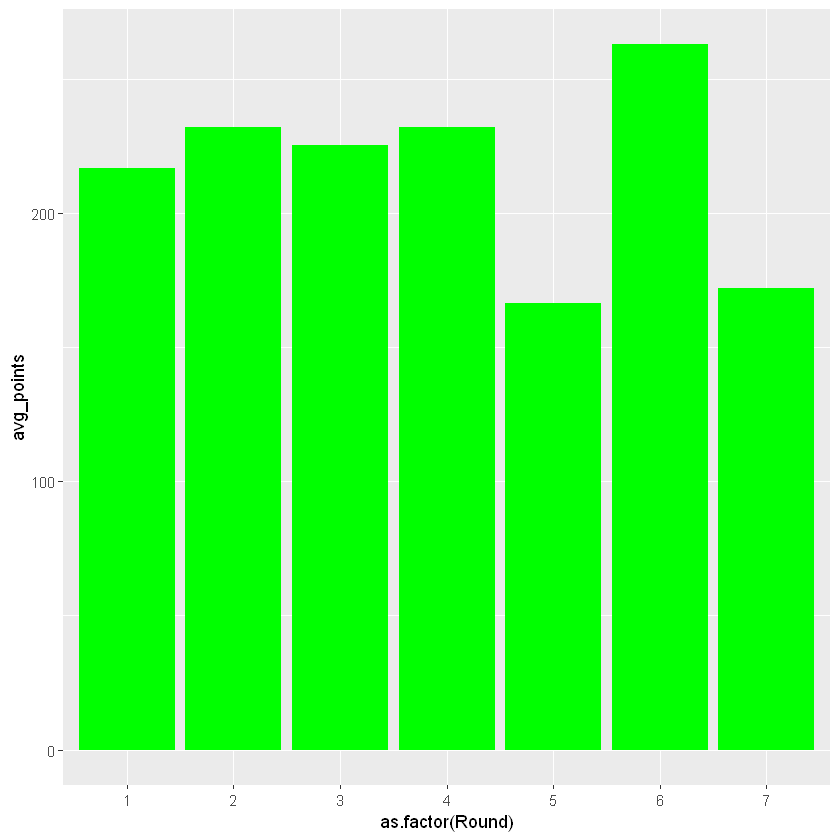

In [49]:
ggplot(round) + 
    geom_bar(aes(x=as.factor(Round), y=avg_points),stat='identity', fill='green') 

Other choices for color/fill: http://sape.inf.usi.ch/quick-reference/ggplot2/colour